In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start = datetime.date(2021, 1, 1)
end = datetime.date(2022, 1, 1)

In [3]:
df1= web.DataReader('BAJAJ-AUTO.NS','yahoo', start, end)
df2= web.DataReader('^NSEI','yahoo', start, end)

In [4]:
df1.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-01-01,3494.000000,3446.000000,3446.000000,3481.250000,421643.0,3243.078613
2021-01-04,3528.000000,3465.000000,3490.000000,3522.449951,647829.0,3281.459961
2021-01-05,3505.000000,3475.000000,3500.250000,3492.649902,561562.0,3253.698730
2021-01-06,3527.000000,3435.899902,3492.649902,3462.699951,591620.0,3225.797852
2021-01-07,3507.350098,3428.250000,3500.000000,3437.949951,531361.0,3202.741211


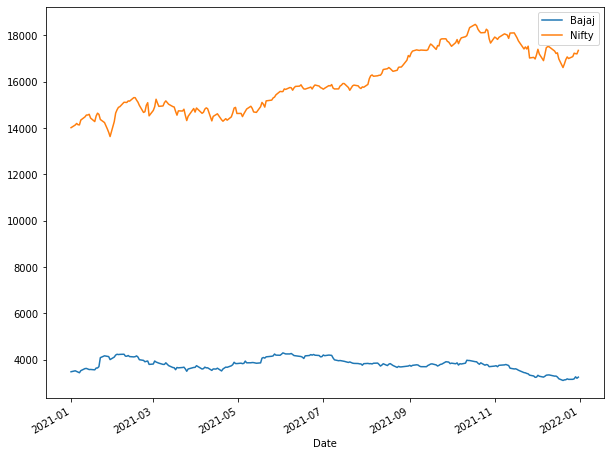

In [5]:
df1['Close'].plot(label='Bajaj', figsize=(10, 8))
df2['Close'].plot(label='Nifty')
plt.legend()

In [6]:
df1['Cumu'] = df1['Close']/df1['Close'].iloc[0]
df2['Cumu'] = df2['Close']/df2['Close'].iloc[0]

In [7]:
df1

,High,Low,Open,Close,Volume,Adj Close,Cumu
Date,,,,,,,
2021-01-01,3494.000000,3446.000000,3446.000000,3481.250000,421643.0,3243.078613,1.000000
2021-01-04,3528.000000,3465.000000,3490.000000,3522.449951,647829.0,3281.459961,1.011835
2021-01-05,3505.000000,3475.000000,3500.250000,3492.649902,561562.0,3253.698730,1.003275
2021-01-06,3527.000000,3435.899902,3492.649902,3462.699951,591620.0,3225.797852,0.994671
2021-01-07,3507.350098,3428.250000,3500.000000,3437.949951,531361.0,3202.741211,0.987562
...,...,...,...,...,...,...,...
2021-12-27,3174.149902,3122.000000,3145.000000,3154.100098,94069.0,3039.926025,0.906025
2021-12-28,3187.550049,3150.000000,3161.199951,3176.050049,214640.0,3061.081543,0.912330
2021-12-29,3269.000000,3152.050049,3188.750000,3262.500000,563709.0,3144.402100,0.937163


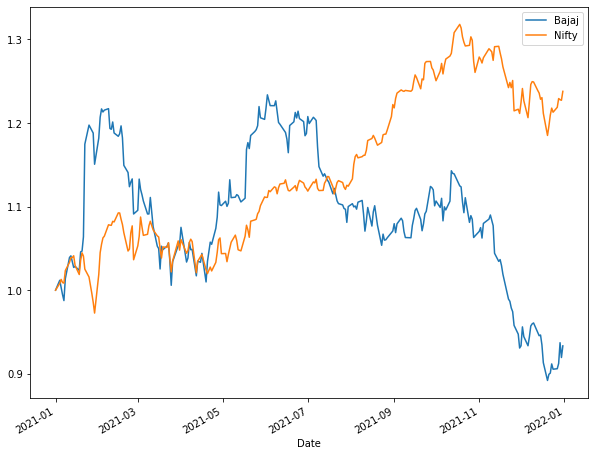

In [8]:
df1['Cumu'].plot(label = 'Bajaj', figsize=(10,8))
df2['Cumu'].plot(label = 'Nifty')
plt.legend()

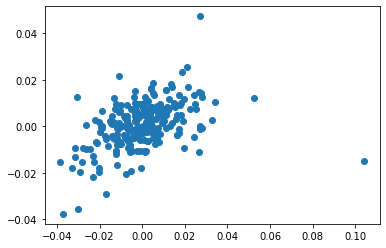

In [9]:
df1['daily_ret'] = df1['Close'].pct_change(1)
df2['daily_ret'] = df2['Close'].pct_change(1)
plt.scatter(df1['daily_ret'],df2['daily_ret'])

In [10]:
LR = stats.linregress(df1['daily_ret'].iloc[1:],df2['daily_ret'].iloc[1:])

In [11]:
LR

LinregressResult(slope=0.27385776221066616, intercept=0.0009568021412857251, rvalue=0.4325599174929512, pvalue=1.1029472727242061e-12, stderr=0.03646801644229375, intercept_stderr=0.0005679889271025377)

In [12]:
beta,alpha,r_val,p_val,std_err = LR

In [13]:
beta

0.27385776221066616

In [14]:
alpha

0.0009568021412857251

In [15]:
rm= df1['daily_ret'].mean()*252

In [16]:
rm

-0.04014899228295591

In [17]:
date = datetime.date(2022, 5, 11)
df11 = web.DataReader('BAJAJ-AUTO.NS', 'yahoo', date, date)
df11

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-11,3627.949951,3537.300049,3600,3612.850098,437746,3482.069824


In [18]:
creturn = 1 + beta*(df1.iloc[-1].at["Cumu"] - 1)

In [19]:
creturn

0.9817493713945065

In [20]:
rreturn = (df11.iloc[0].at["Close"])/(df1.iloc[0].at["Close"])

In [21]:
rreturn

1.0378025415170558

In [22]:
cerror = rreturn - creturn
cerror

0.05605317012254929

In [23]:
cperror = (cerror/rreturn)*100
cperror

5.401140186129337

In [24]:
SMB = 0.17
HML = 0.15

In [25]:
freturn = 1 + alpha + beta*(df1.iloc[-1].at["Cumu"] - 1) + beta*SMB + beta*HML

In [26]:
freturn

1.0703406574432055

In [27]:
ferror = abs(freturn - rreturn)
ferror

0.03253811592614975

In [28]:
fperror = (ferror/rreturn)*100
fperror

3.13528967452572